In [6]:
#Importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB

In [24]:
excel_file_path = r'C:\Users\Rahul\Desktop\DS_Project\sample_tweet_data.xlsx'
df = pd.read_excel(excel_file_path)

In [9]:
#df=df.drop('Unnamed: 0',axis=1)

In [25]:
df.head()

,tweets,class,cleaned_tweets
0,@Arctic_Warlocks @mttgcast I find this so hila...,figurative,"['find', 'hilarious', 'much', 'talk', 'underst..."
1,@TannerStewart95 very true. Gosh I just can't ...,sarcasm,"['true', 'gosh', 'cannot', 'wait', 'sarcastic']"
2,Becky is saying I think I can I think I can I ...,irony,"['becky', 'saying', 'think', 'think', 'think',..."
3,Jared Fogle's dramatic weight loss from Subway...,sarcasm,"['jared', 'fogles', 'dramatic', 'weight', 'los..."
4,Oh how I love it when customers throw their mo...,figurative,"['oh', 'love', 'customers', 'throw', 'money', ..."


In [26]:
class_count=df['class'].value_counts()
class_count

irony         2626
figurative    2580
sarcasm       2549
regular       2245
Name: class, dtype: int64

In [27]:
# Converting figurative class into irony or sarcasm baesd on similiarty
figurative_df = df[df['class'] == 'figurative']
other_df = df[df['class'] != 'figurative']


In [28]:
# Calculate TF-IDF vectors
from sklearn.metrics.pairwise import cosine_similarity
tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(df['cleaned_tweets'])

# Calculate cosine similarity
similarity_matrix = cosine_similarity(tfidf_matrix)

# Iterate through figurative samples
for idx, row in figurative_df.iterrows():
    similarities = similarity_matrix[idx]
    sarcasm_similarity = similarities[other_df[other_df['class'] == 'sarcasm'].index]
    irony_similarity = similarities[other_df[other_df['class'] == 'irony'].index]
    
    if sarcasm_similarity.max() > irony_similarity.max():
        df.at[idx, 'class'] = 'sarcasm'
    else:
        df.at[idx, 'class'] = 'irony'

In [29]:
df.head()

,tweets,class,cleaned_tweets
0,@Arctic_Warlocks @mttgcast I find this so hila...,irony,"['find', 'hilarious', 'much', 'talk', 'underst..."
1,@TannerStewart95 very true. Gosh I just can't ...,sarcasm,"['true', 'gosh', 'cannot', 'wait', 'sarcastic']"
2,Becky is saying I think I can I think I can I ...,irony,"['becky', 'saying', 'think', 'think', 'think',..."
3,Jared Fogle's dramatic weight loss from Subway...,sarcasm,"['jared', 'fogles', 'dramatic', 'weight', 'los..."
4,Oh how I love it when customers throw their mo...,sarcasm,"['oh', 'love', 'customers', 'throw', 'money', ..."


In [30]:
import openpyxl
excel_file_path = r'C:/Users/Rahul/Desktop/DS_Project/sample_tweet_data.xlsx'
book = openpyxl.load_workbook(excel_file_path)

with pd.ExcelWriter(excel_file_path, engine='openpyxl') as writer:
    writer.book = book
    writer.sheets = dict((ws.title, ws) for ws in book.worksheets)
    df.to_excel(writer, sheet_name='3classdata', index=False)

    writer.save()

print(f"updated df saved to '{excel_file_path}' in a new sheet named '3classdata'")

updated df saved to 'C:/Users/Rahul/Desktop/DS_Project/sample_tweet_data.xlsx' in a new sheet named '3classdata'


In [31]:
updated_class_count=df['class'].value_counts()
updated_class_count

sarcasm    3988
irony      3767
regular    2245
Name: class, dtype: int64

In [32]:
label_encoder=LabelEncoder()
df['class']=label_encoder.fit_transform(df['class'])

In [33]:
updated_class_count1=df['class'].value_counts()
updated_class_count1

2    3988
0    3767
1    2245
Name: class, dtype: int64

#### Label Coders
     Irony encoded as 0
     regular encoded as 1
     sarcasm encoded as 2


In [34]:
y=df['class']

In [35]:
# Initialize TfidfVectorizer
tfidf_vectorizer=TfidfVectorizer(stop_words=None)
X_tfidf=tfidf_vectorizer.fit_transform(df['cleaned_tweets'])
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)

#### Class count in test data

In [36]:
# Calculate the class counts in the test set
class_counts_test = dict(zip(*np.unique(y_test, return_counts=True)))

# Print the class counts in the test set
for class_label, count in class_counts_test.items():
    print(f"Class {class_label}: {count} instances")

Class 0: 748 instances
Class 1: 464 instances
Class 2: 788 instances


In [37]:
from sklearn.linear_model import LogisticRegression
le=LogisticRegression()
le.fit(X_train.toarray(),y_train)
le_ypred=le.predict(X_test.toarray())

In [38]:
# Calculate accuracy
accuracy = accuracy_score(y_test, le_ypred)
print("Accuracy:", accuracy)

Accuracy: 0.9215


In [39]:
from sklearn.metrics import classification_report,confusion_matrix
print('Classification_report:\n',classification_report(y_test, le_ypred))
print('Confusion_Matrix:\n',confusion_matrix(y_test, le_ypred))

Classification_report:
               precision    recall  f1-score   support

           0       0.89      0.91      0.90       748
           1       0.99      1.00      1.00       464
           2       0.91      0.89      0.90       788

    accuracy                           0.92      2000
   macro avg       0.93      0.93      0.93      2000
weighted avg       0.92      0.92      0.92      2000

Confusion_Matrix:
 [[680   2  66]
 [  0 464   0]
 [ 87   2 699]]


In [40]:
le_conf_matrix=confusion_matrix(y_test, le_ypred)

In [41]:
def breakdown_matrix(conf_matrix):
    class_labels, class_counts_actual = np.unique(y_test, return_counts=True)
    class_counts_predicted = np.sum(conf_matrix, axis=1)
    print("\nClass Distribution in Actual Test Data:")
    
    for label, count_actual, count_predicted in zip(class_labels, class_counts_actual, class_counts_predicted):
        print(f"Class {label}: {count_actual} instances, Predicted {count_predicted} instances")

# Print a breakdown of the confusion matrix
    class_labels=['irony','regular','sarcasm']
    for i in range(len(class_labels)):
        print(f"\nClass {class_labels[i]} (Actual):")
        for j in range(len(class_labels)):
            if i == j:
                true_positives = conf_matrix[i, j]
                print(f"  Predicted as Class {class_labels[i]}: {true_positives} (True Positives)")
            else:
                false_positives = conf_matrix[i, j]
                false_negatives = np.sum(conf_matrix[j, :]) - conf_matrix[j, j]
                print(f"  Predicted as Class {class_labels[i]} but Actual Class {class_labels[j]}: {false_positives} (False Positives)")
                print(f"  Predicted as NOT Class {class_labels[i]} but Actual Class {class_labels[j]}: {false_negatives} (False Negatives)")

        total_actual = class_counts_actual[i]
        total_predicted = class_counts_predicted[i]
        print(f"  Total instances: {total_actual} (Actual), {total_predicted} (Predicted)")


#### Logistic Regression Confusion Matrix Breakdown

In [42]:
breakdown_matrix(le_conf_matrix)


Class Distribution in Actual Test Data:
Class 0: 748 instances, Predicted 748 instances
Class 1: 464 instances, Predicted 464 instances
Class 2: 788 instances, Predicted 788 instances

Class irony (Actual):
  Predicted as Class irony: 680 (True Positives)
  Predicted as Class irony but Actual Class regular: 2 (False Positives)
  Predicted as NOT Class irony but Actual Class regular: 0 (False Negatives)
  Predicted as Class irony but Actual Class sarcasm: 66 (False Positives)
  Predicted as NOT Class irony but Actual Class sarcasm: 89 (False Negatives)
  Total instances: 748 (Actual), 748 (Predicted)

Class regular (Actual):
  Predicted as Class regular but Actual Class irony: 0 (False Positives)
  Predicted as NOT Class regular but Actual Class irony: 68 (False Negatives)
  Predicted as Class regular: 464 (True Positives)
  Predicted as Class regular but Actual Class sarcasm: 0 (False Positives)
  Predicted as NOT Class regular but Actual Class sarcasm: 89 (False Negatives)
  Total in

In [43]:
from sklearn.ensemble import RandomForestClassifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the model on the training data
rf_classifier.fit(X_train.toarray(), y_train)

# Make predictions on the testing data
rf_ypred = rf_classifier.predict(X_test.toarray())

In [44]:
# Calculate accuracy
rf_accuracy = accuracy_score(y_test, rf_ypred)
print("Accuracy:", accuracy)

Accuracy: 0.9215


In [45]:
from sklearn.metrics import classification_report,confusion_matrix
print('Classification_report:\n',classification_report(y_test, rf_ypred))
print('Confusion_Matrix:\n',confusion_matrix(y_test, rf_ypred))

Classification_report:
               precision    recall  f1-score   support

           0       0.89      0.91      0.90       748
           1       0.99      1.00      0.99       464
           2       0.92      0.89      0.90       788

    accuracy                           0.92      2000
   macro avg       0.93      0.93      0.93      2000
weighted avg       0.92      0.92      0.92      2000

Confusion_Matrix:
 [[678   5  65]
 [  0 464   0]
 [ 85   2 701]]


#### RandomForest Confusion Matrix Breakdown

In [46]:
rf_conf_matrix=confusion_matrix(y_test, rf_ypred)
breakdown_matrix(rf_conf_matrix)


Class Distribution in Actual Test Data:
Class 0: 748 instances, Predicted 748 instances
Class 1: 464 instances, Predicted 464 instances
Class 2: 788 instances, Predicted 788 instances

Class irony (Actual):
  Predicted as Class irony: 678 (True Positives)
  Predicted as Class irony but Actual Class regular: 5 (False Positives)
  Predicted as NOT Class irony but Actual Class regular: 0 (False Negatives)
  Predicted as Class irony but Actual Class sarcasm: 65 (False Positives)
  Predicted as NOT Class irony but Actual Class sarcasm: 87 (False Negatives)
  Total instances: 748 (Actual), 748 (Predicted)

Class regular (Actual):
  Predicted as Class regular but Actual Class irony: 0 (False Positives)
  Predicted as NOT Class regular but Actual Class irony: 70 (False Negatives)
  Predicted as Class regular: 464 (True Positives)
  Predicted as Class regular but Actual Class sarcasm: 0 (False Positives)
  Predicted as NOT Class regular but Actual Class sarcasm: 87 (False Negatives)
  Total in

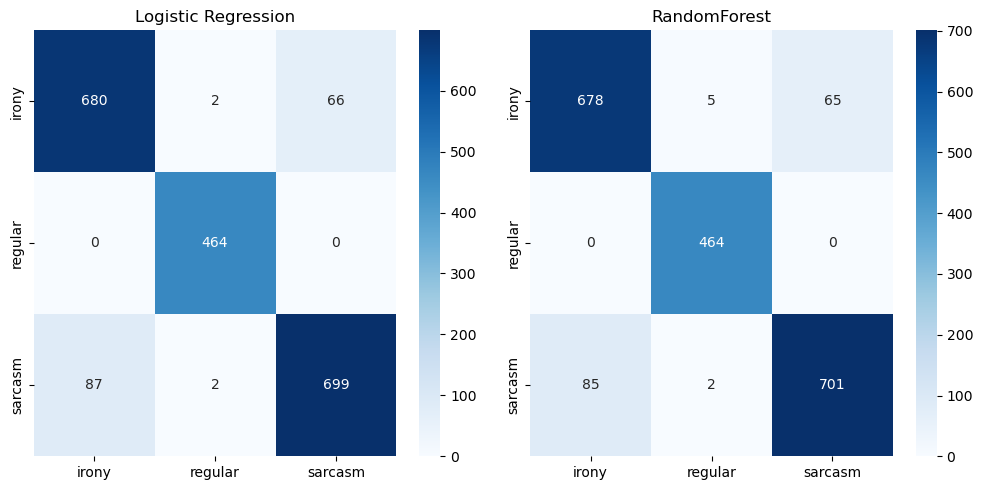

In [47]:
plt.figure(figsize=(15, 5))
class_labels=['irony','regular','sarcasm']
plt.subplot(1, 3, 1)
sns.heatmap(le_conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
plt.title("Logistic Regression")

plt.subplot(1, 3, 2)
sns.heatmap(rf_conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
plt.title("RandomForest")

plt.tight_layout()
plt.show()


In [48]:
import pickle
with open(r'C:\Users\Rahul\Desktop\DS_Project\lg_model.pkl', 'wb') as model_file:
    pickle.dump(le, model_file)

In [49]:
#from sklearn.externals import joblib
with open(r'C:\Users\Rahul\Desktop\DS_Project\tfidf_vectorizer.pkl', 'wb') as vectorizer_file:
    #joblib.dump(tfidf_vectorizer, 'tfidf_vectorizer.pkl')
    pickle.dump(tfidf_vectorizer, vectorizer_file)
    